In [1]:
from plotters import setup_layout
from IPython.display import display
setup_layout()

### Some [basic commands](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html) in jupyter notebook

1. Difference between `edit` mode and `command` mode, `edit` mode has green bars on the left of the cell while `command` mode has blue bars on the left

2. A cell like this is called markdown cell, which is commonly used for recording some notes, equations, etc.

3. On the top menu bar, under `help` -> `Keyboard shortcuts`, there are some useful shortcuts, such as cut cell, paste cell, add cell below/above, switch between `code` mode and `markdown` mode. To run a cell you can either click the `run cell` button on the menu bar, or you can just hit `ctrl + enter`, `shift + enter` also works and it will __create a new cell / shift to the cell__ down below.

4. When using a function and you are not sure what arguments to fill in, press `shift + tab`

Now let us move on for practice

Load some packages, numpy, pandas, matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt

# To embed the matplotlib plot in the notebook
%matplotlib inline

Load the data in Econ 140 PS1

In [3]:
df = pd.read_stata("PS1data(NBA).dta")

Display the dataframe

In [4]:
display(df)

,married,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,black,children
0,1,1002.500000,4,27,4,77,2867,1,0,0,16,4,5,19.0,0,37.230000,1,0
1,1,2030.000000,5,28,4,78,2789,1,0,0,13,3,9,28.0,0,35.759998,1,1
2,0,650.000000,1,25,4,74,1149,0,0,1,6,3,0,19.0,0,15.530000,1,0
3,0,2030.000000,5,28,4,47,1178,0,1,0,7,5,2,1.0,0,25.059999,1,0
4,0,755.000000,3,24,4,82,2096,1,0,0,11,4,3,24.0,0,25.559999,1,0
5,0,2014.500000,9,31,4,82,1971,0,1,0,11,5,2,4.0,0,24.040001,1,0
6,1,1065.000000,1,28,0,80,2303,0,1,0,15,7,1,40.0,0,28.790001,0,0
7,0,420.000000,3,27,3,67,1131,0,1,0,7,4,1,47.0,0,16.879999,1,0
8,1,150.000000,1,25,4,60,542,1,0,0,3,1,2,NaN,0,9.030000,1,0
9,1,3050.000000,12,35,3,74,2700,0,1,0,26,7,2,3.0,1,36.490002,1,1


Describe the dataframe

In [13]:
df.describe()

,married,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,black,children
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,240.00000,269.000000,269.000000,269.000000,269.000000
mean,0.442379,1423.827515,5.118959,27.394052,3.717472,65.724907,1682.193309,0.420074,0.408922,0.171004,10.260223,4.468401,2.453532,20.20000,0.115242,23.979256,0.806691,0.345725
std,0.497595,999.774048,3.400062,3.391292,0.754410,18.851110,893.327771,0.494491,0.492551,0.377214,5.882489,2.892980,2.148124,18.73582,0.319909,9.731086,0.395629,0.476491
min,0.000000,150.000000,1.000000,21.000000,0.000000,3.000000,33.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,2.890000,0.000000,0.000000
25%,0.000000,650.000000,2.000000,25.000000,4.000000,57.000000,983.000000,0.000000,0.000000,0.000000,5.000000,2.000000,1.000000,7.00000,0.000000,16.730000,1.000000,0.000000
50%,0.000000,1186.000000,4.000000,27.000000,4.000000,74.000000,1690.000000,0.000000,0.000000,0.000000,9.000000,4.000000,2.000000,14.50000,0.000000,24.820000,1.000000,0.000000
75%,1.000000,2014.500000,7.000000,30.000000,4.000000,79.000000,2438.000000,1.000000,1.000000,0.000000,14.000000,6.000000,3.000000,28.25000,0.000000,33.259998,1.000000,1.000000
max,1.000000,5740.000000,18.000000,41.000000,4.000000,82.000000,3533.000000,1.000000,1.000000,1.000000,30.000000,17.000000,13.000000,139.00000,1.000000,43.090000,1.000000,1.000000


Show the histogram of the wages

(array([76., 73., 38., 34., 23., 14.,  8.,  2.,  0.,  1.]),
 array([ 150.,  709., 1268., 1827., 2386., 2945., 3504., 4063., 4622.,
        5181., 5740.]),
 <a list of 10 Patch objects>)

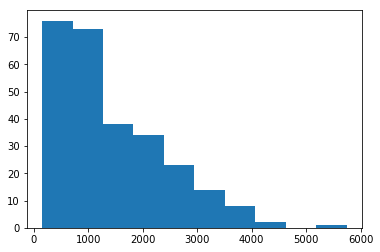

In [5]:
plt.hist(df.wage)

Now let us walk through the first question in PS1:
* To begin with, test whether players who play the guard position are paid the same as other players.
Be sure to report the results of your test including the t-statistic and p-value. [For those unfamiliar
with American basketball, players are classified as playing one of three positions: guard, forward and
center.]

So we need to group the players as guard or other positions

In [9]:
guards_df = df[df.guard==1]
others_df = df[df.guard==0]

Now display the description of `guards_df` and `others_df`

In [15]:
display(guards_df.describe())
display(others_df.describe())

,married,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,black,children
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0,113.0,113.0,113.000000,113.000000,113.000000,100.000000,113.000000,113.000000,113.000000,113.000000
mean,0.460177,1277.658447,4.911504,27.132743,3.778761,68.336283,1806.230088,1.0,0.0,0.0,10.955752,2.840708,3.734513,23.490000,0.123894,25.177168,0.831858,0.345133
std,0.500632,832.518188,3.177930,3.109618,0.651023,16.343746,880.257379,0.0,0.0,0.0,5.446803,1.491442,2.474938,20.814474,0.330928,9.417118,0.375658,0.477529
min,0.000000,150.000000,1.000000,23.000000,0.000000,16.000000,149.000000,1.0,0.0,0.0,1.000000,1.000000,0.000000,2.000000,0.000000,6.770000,0.000000,0.000000
25%,0.000000,650.000000,2.000000,24.000000,4.000000,64.000000,1035.000000,1.0,0.0,0.0,6.000000,2.000000,2.000000,10.000000,0.000000,17.610001,1.000000,0.000000
50%,0.000000,1120.000000,4.000000,27.000000,4.000000,75.000000,1949.000000,1.0,0.0,0.0,10.000000,3.000000,3.000000,18.000000,0.000000,26.260000,1.000000,0.000000
75%,1.000000,2000.000000,7.000000,29.000000,4.000000,80.000000,2605.000000,1.0,0.0,0.0,15.000000,4.000000,5.000000,31.250000,0.000000,33.750000,1.000000,1.000000
max,1.000000,4000.000000,13.000000,35.000000,4.000000,82.000000,3533.000000,1.0,0.0,0.0,23.000000,9.000000,13.000000,139.000000,1.000000,43.090000,1.000000,1.000000


,married,wage,exper,age,coll,games,minutes,guard,forward,center,points,rebounds,assists,draft,allstar,avgmin,black,children
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,140.000000,156.000000,156.000000,156.000000,156.000000
mean,0.429487,1529.706421,5.269231,27.583333,3.673077,63.833333,1592.346154,0.0,0.705128,0.294872,9.756410,5.647436,1.525641,17.850000,0.108974,23.111538,0.788462,0.346154
std,0.496597,1095.710449,3.554817,3.579436,0.820413,20.318697,894.758484,0.0,0.457454,0.457454,6.146986,3.087549,1.220517,16.782538,0.312611,9.891669,0.409715,0.477275
min,0.000000,150.000000,1.000000,21.000000,0.000000,3.000000,33.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.890000,0.000000,0.000000
25%,0.000000,666.500000,2.000000,25.000000,4.000000,52.500000,874.250000,0.0,0.000000,0.000000,5.000000,3.000000,1.000000,5.000000,0.000000,16.220001,1.000000,0.000000
50%,0.000000,1200.000000,4.000000,27.000000,4.000000,73.000000,1566.500000,0.0,1.000000,0.000000,9.000000,5.000000,1.000000,12.500000,0.000000,23.695001,1.000000,0.000000
75%,1.000000,2317.250000,8.000000,30.000000,4.000000,79.000000,2327.000000,0.0,1.000000,1.000000,12.250000,7.000000,2.000000,27.000000,0.000000,32.412499,1.000000,1.000000
max,1.000000,5740.000000,18.000000,41.000000,4.000000,82.000000,3329.000000,0.0,1.000000,1.000000,30.000000,17.000000,5.000000,79.000000,1.000000,40.959999,1.000000,1.000000


Run t-test using `statsmodels` or `scipy.stats`

In [17]:
print "statsmodels results:", sm.stats.ttest_ind(guards_df.wage, others_df.wage)
print "scipy.stats results:", ttest_ind(guards_df.wage, others_df.wage)

statsmodels results: (-2.0530342338169745, 0.04104363557405168, 267.0)
scipy.stats results: Ttest_indResult(statistic=-2.0530339642265734, pvalue=0.04104366192045314)
